In [15]:
#Loading the data using pandas library
#The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, physician at the University
#Of Wisconsin Hospital at Madison, Wisconsin, USA. To create the dataset Dr. Wolberg used fluid samples, taken from patients
#with solid breast masses and an easy-to-use graphical computer program called Xcyt, which is capable of perform the analysis
#of cytological features based on a digital scan. The program uses a curve-fitting algorithm, to compute ten features from
#each one of the cells in the sample

import pandas as pd
import  matplotlib.pyplot as plt
cancer = pd.read_csv('cancer_dataset.csv')
cancero= cancer.iloc[:, 1:12]
#cancer.head()
cancero.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [17]:
cancer.shape

(569, 33)

In [18]:
features, labels= cancero.iloc[:, 1:10], cancero.loc[:,['diagnosis']]
print(features)
print(labels)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

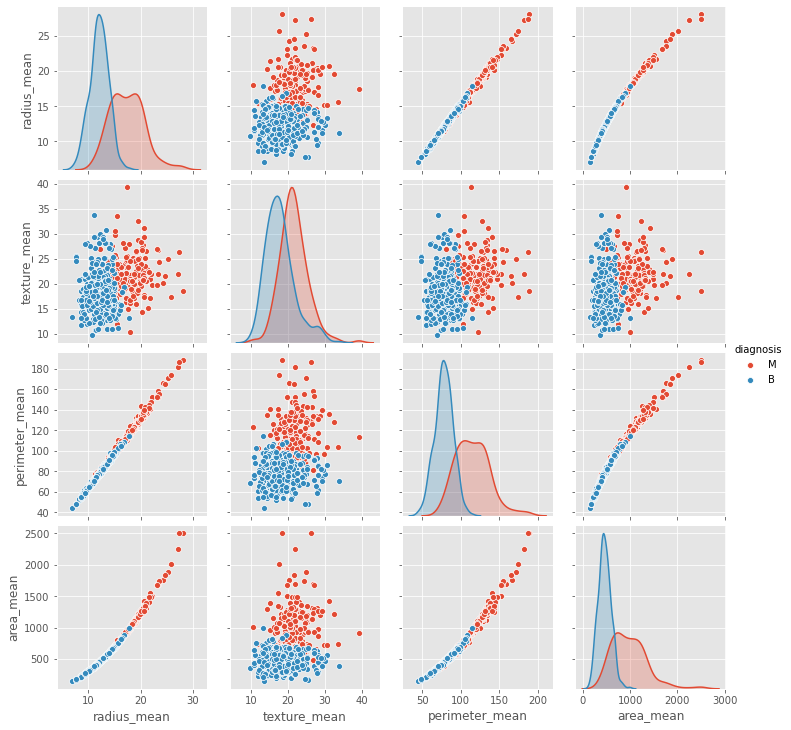

In [20]:
#Vizualizing the data
import seaborn as sns
plt.style.use(['ggplot']) 
fig= sns.pairplot(cancero.loc[:,'diagnosis':'area_mean'], hue="diagnosis");
fig.savefig('mytree.png')


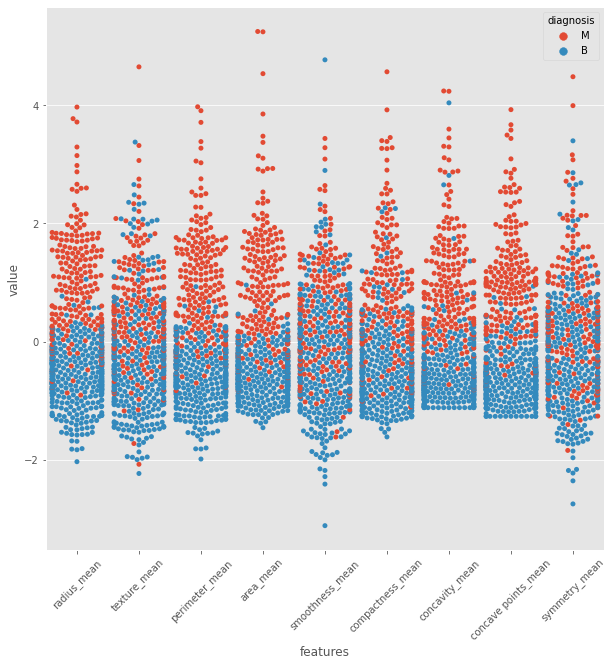

In [21]:
#Vizualizing the data
#As you can see, the bigger the radius, texture, perimeter, the more likely you are
#to have Malign cases

data = pd.DataFrame(features)
data_n_2 = (data - data.mean()) / (data.std())  
data = pd.concat([labels,data_n_2.iloc[:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

#Symmetry and symmetry breaking in cancer: a foundational approach to the cancer problem

In [22]:
#scaling the data
from sklearn.model_selection import  train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler
X, y=features,labels
sc = StandardScaler()
X = sc.fit_transform(X)
#randomly selecting 80% of the data for training purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,random_state=42)
#creating  DECISION TREE with 5 levels 
clf = tree.DecisionTreeClassifier(max_depth = 5)
#Testing the remaining 20%
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_test,y_pred)


    diagnosis
204         B
70          M
131         M
431         B
540         B
..        ...
486         B
75          M
249         B
238         B
265         M

[114 rows x 1 columns] ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M']


In [24]:
#creating a confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68,  3],
       [ 3, 40]], dtype=int64)

In [25]:
# check true positve, true negative, false positive, and false negative
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
acc=float(tn+tp)/float(tn+fp+fn+tp)
print("Accuracy=%f" % acc)

68 3 3 40
Accuracy=0.947368


[Text(155.44285714285715, 199.32, 'X[7] <= 0.061\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(88.48285714285714, 163.07999999999998, 'X[3] <= 0.118\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(52.611428571428576, 126.83999999999999, 'X[1] <= 0.532\ngini = 0.051\nsamples = 266\nvalue = [259, 7]'),
 Text(19.13142857142857, 90.6, 'X[7] <= -0.384\ngini = 0.018\nsamples = 224\nvalue = [222, 2]'),
 Text(9.565714285714286, 54.359999999999985, 'gini = 0.0\nsamples = 189\nvalue = [189, 0]'),
 Text(28.697142857142858, 54.359999999999985, 'X[5] <= -0.753\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(19.13142857142857, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(38.26285714285714, 18.119999999999976, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(86.09142857142857, 90.6, 'X[7] <= -0.128\ngini = 0.21\nsamples = 42\nvalue = [37, 5]'),
 Text(66.96000000000001, 54.359999999999985, 'X[1] <= 0.535\ngini = 0.142\nsamples = 39\nvalue = [36, 3

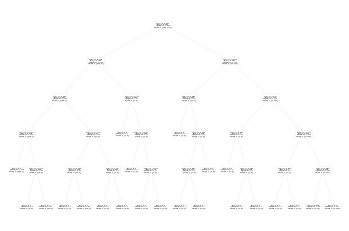

In [26]:
tree.plot_tree(clf)

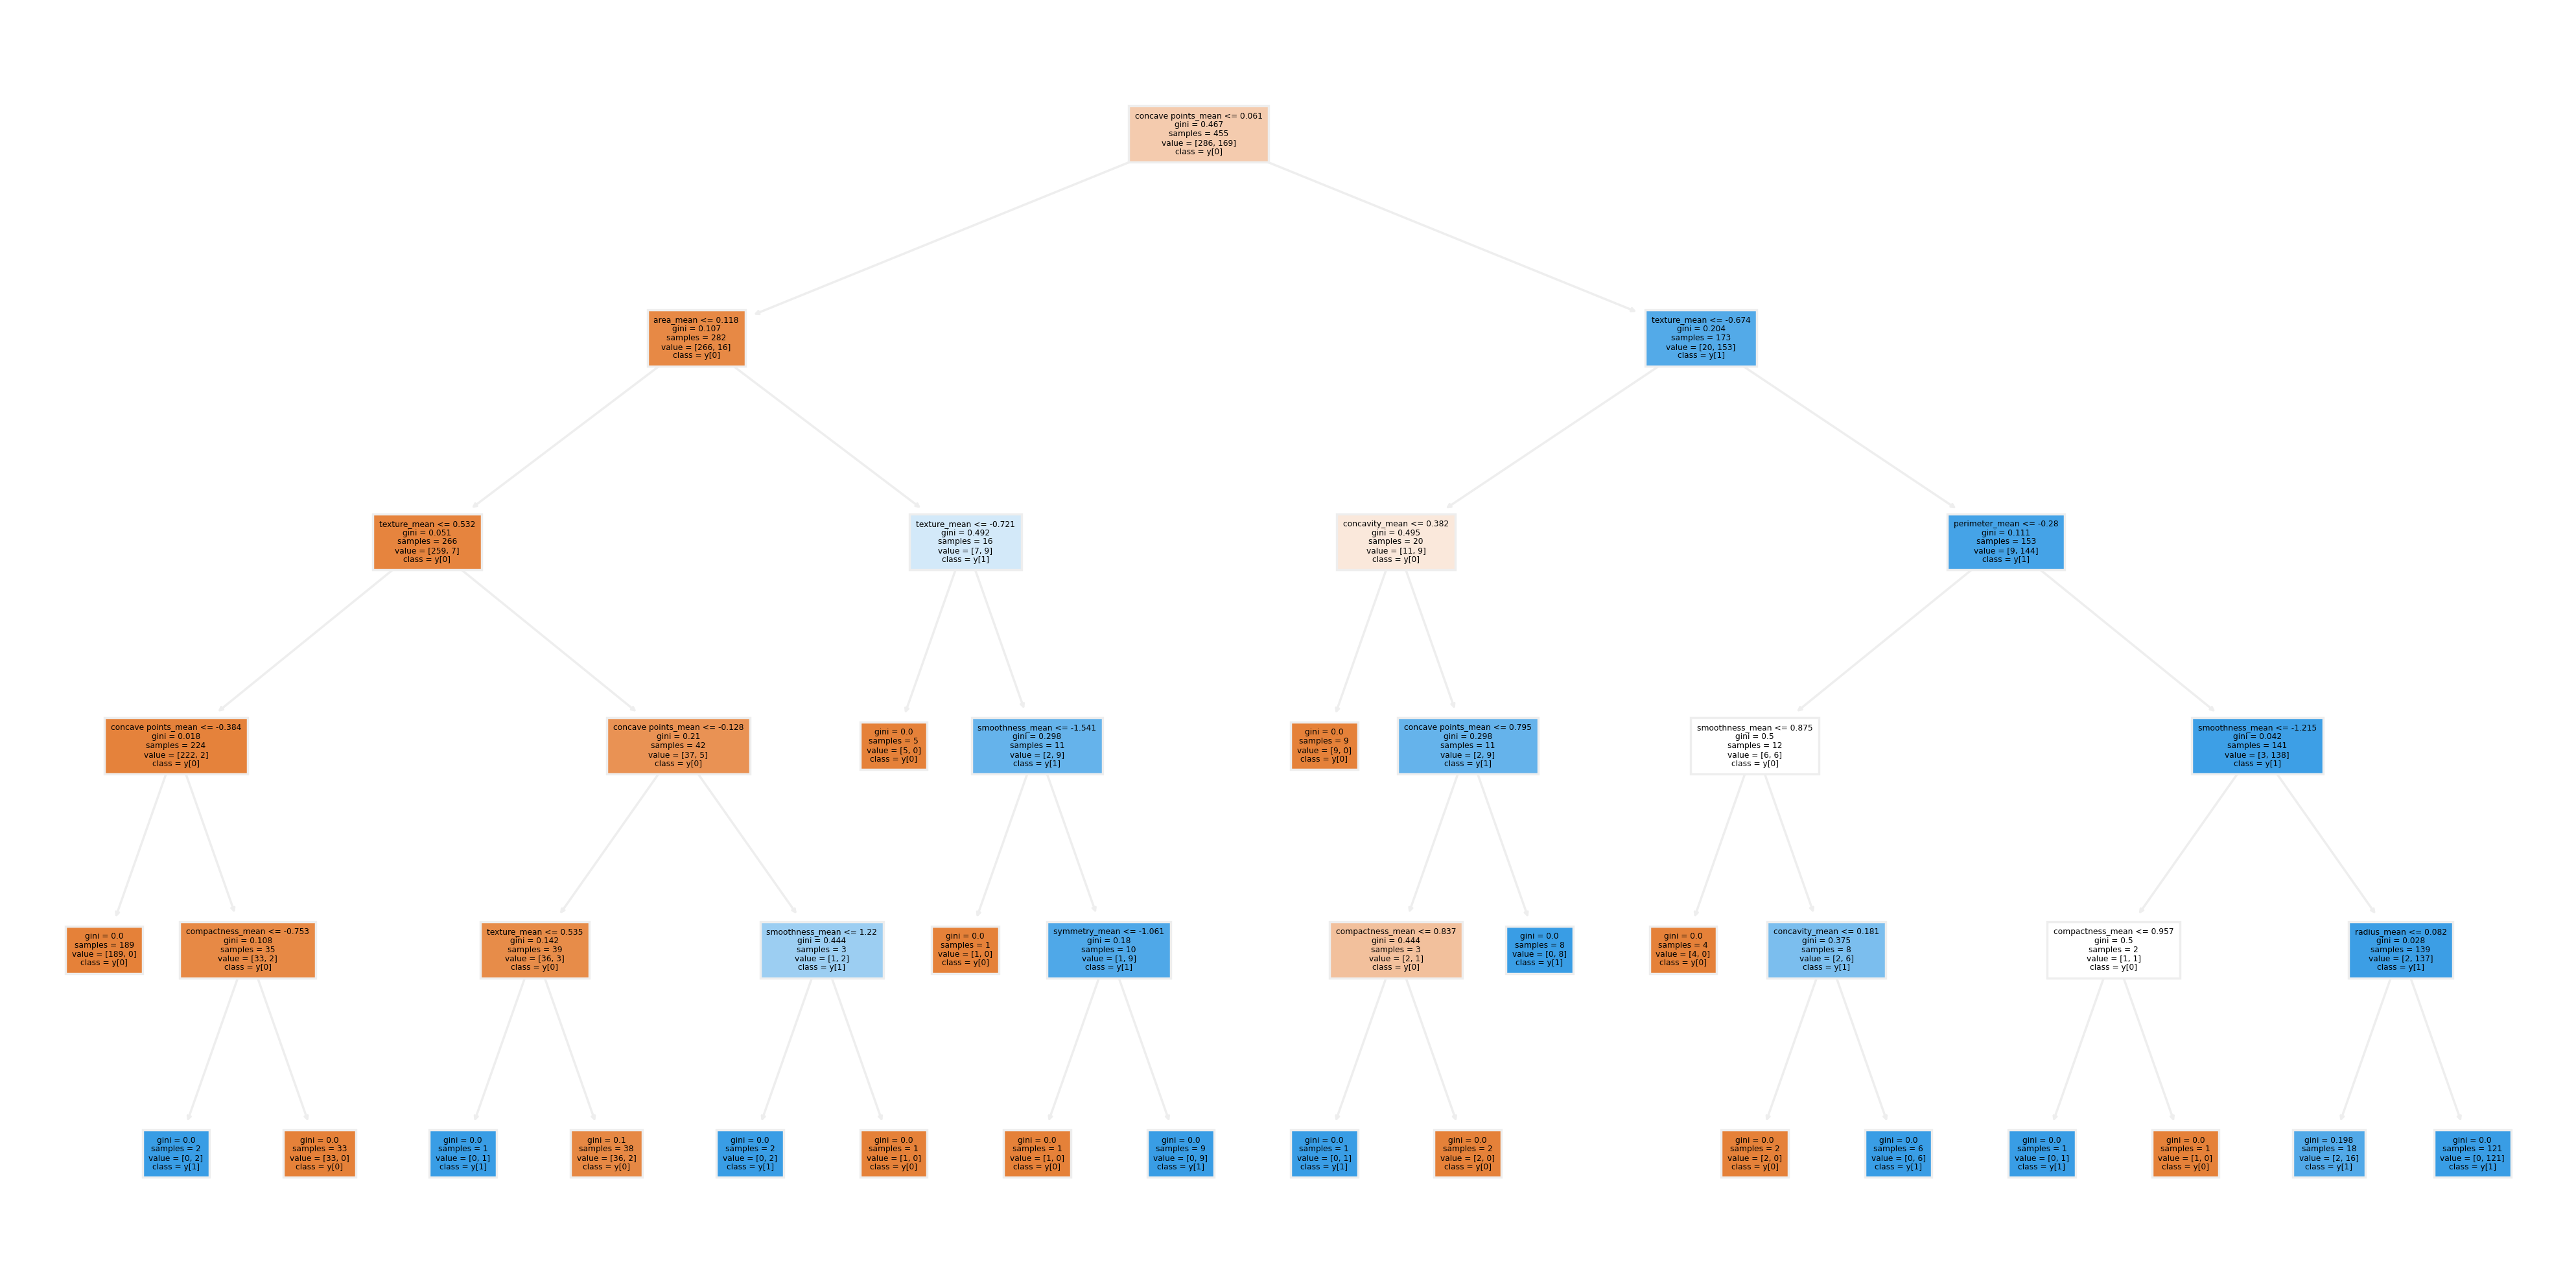

In [27]:
plt.rcParams.update({'font.size': 5})
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,5), dpi=500)
tree.plot_tree(clf,
               feature_names = features.columns,
               class_names= True, 
               filled = True); 
fig.savefig('cancerTrees.jpg.')

In [69]:
#The random forest method consists in creating multiple decision trees
#and taking the average of those to make the prediction.
#This method improves the accuracy of the decision tree model as 
#it prevents the data from overfitting the model
from sklearn.ensemble import RandomForestClassifier
clf_ = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_test,y_pred)

    diagnosis
204         B
70          M
131         M
431         B
540         B
..        ...
486         B
75          M
249         B
238         B
265         M

[114 rows x 1 columns] ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'M' 'M']


In [71]:
#creatig a confusion matrix for "random forests"
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[69,  2],
       [ 3, 40]], dtype=int64)

In [72]:
# check true positve, true negative, false positive, and false negative
#for random forests
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
acc=float(tn+tp)/float(tn+fp+fn+tp)
print("Accuracy=%f" % acc)

69 2 3 40
Accuracy=0.956140


In [101]:
# for Support Vector Machine
from sklearn import svm 
# to check the accuracy
from sklearn import metrics 
import numpy as np
#creating the SVM model
model = svm.SVC()
y_train= np.ravel(y_train)
# now fit our model for training the model data
model.fit(X_train,y_train)
# predict for the test data
prediction=model.predict(X_test)
#******************************************
metrics.accuracy_score(prediction,y_test)
print(metrics.accuracy_score(prediction,y_test))
metrics.confusion_matrix(y_test,prediction)

0.9736842105263158


array([[71,  0],
       [ 3, 40]], dtype=int64)

In [ ]:
#All three methods gave satisfying results 
#Support Vector machine gave a 97% acccuracy 
#Random forests was 95.6% accurate
#Decision trees was 95% accurate

#interestingly enough incresing the depth of the decision tree in DT and RF did not generate greater accuracy
#The mean, standard error and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.